In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
# Importing the candlestick formulas 
import plotly.graph_objects as go

In [3]:
#importing the pandas_ta to measure the ADX for volatility 
import pandas_ta as ta 

In [4]:
#sample tickers
tickers = ['BTC-USD', 'ETH-USD','MSFT', 'GOOGL', 'AAPL', 'AMZN', 'META', 'NVDA', 'TSLA']
intervals = []
k_values = [0.3, 0.4, 0.5]
df = dict() #['tickers': df]
# historical_data  = ticker.history(period="7d", interval="1m")  # trying to get only 1m interval for 7period 
rangedf = dict() #to store for the day for open and close price for each day 

In [5]:
for ticker in tickers:
    # df[ticker] = yf.download(ticker, start='2021-01-01', end='2021-12-31')
    rangedf[ticker] = yf.download(ticker, period = "720d", interval = "1d")
    df[ticker] = yf.download(ticker, period = "720d", interval = "1h") #periods scraping 730days and interval with only 1hrs 
    df[ticker] = df[ticker].reset_index()
    rangedf[ticker] = rangedf[ticker].reset_index()
    df[ticker]['Datetime'] = df[ticker]['Datetime'].dt.strftime("%Y-%m-%d")  
    df[ticker].drop(['Adj Close'], axis = 1, inplace = True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [6]:
df['MSFT'].ta.adx(high='High', low='Low', close='Close', length=14)

,ADX_14,DMP_14,DMN_14
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
5013,33.597548,24.679034,21.693986
5014,31.907875,25.423440,20.825332
5015,30.144998,24.585131,21.270848
5016,27.991815,23.509114,23.509320


In [7]:

df1 = rangedf['BTC-USD'][:100]
fig = go.Figure(data=[go.Candlestick(x=df1.Date,
                open=df1['Open'],
                high=df1['High'],
                low=df1['Low'],
                close=df1['Close'])])

fig.show()

# 1.Larry William Volatillity Breakout Strategy Formula
<img src="LarryWilliam.png" alt="LarryWilliamFormula" style="width:50%;" />


In [8]:
#making the higher range and lower range for each of the day 
for ticker in tickers:
    row, col = rangedf[ticker].shape
    rangedf[ticker]['Range'] = rangedf[ticker]['High'].shift(1) - rangedf[ticker]['Low'].shift(1)
    for k in k_values:
        # rangedf[ticker] = rangedf[ticker].iloc[1:]
        rangedf[ticker][f'{ticker} Higher Range{str(k)}'] = rangedf[ticker]['Open'] + (rangedf[ticker]['Range'] * k)
        rangedf[ticker][f'{ticker} Lower Range{str(k)}'] = rangedf[ticker]['Open'] - (rangedf[ticker]['Range'] * k)
    rangedf[ticker] = rangedf[ticker].iloc[1:]


In [9]:
df['BTC-USD']

,Datetime,Open,High,Low,Close,Volume
0,2022-05-21,29199.859375,29302.439453,29168.476562,29268.355469,0
1,2022-05-21,29268.769531,29278.212891,29027.394531,29124.964844,0
2,2022-05-21,29126.222656,29233.199219,29074.615234,29204.816406,0
3,2022-05-21,29203.884766,29242.314453,29119.677734,29242.314453,0
4,2022-05-21,29244.060547,29250.714844,29208.951172,29226.777344,0
...,...,...,...,...,...,...
17222,2024-05-09,61227.433594,61227.433594,60860.144531,60860.144531,93763584
17223,2024-05-09,60796.273438,61138.265625,60660.460938,61054.527344,556580864
17224,2024-05-09,61030.644531,61514.394531,61030.644531,61511.660156,472649728
17225,2024-05-09,61496.011719,61496.011719,60916.242188,61136.191406,247199744


In [10]:
#The values you need for LarryWilliams 
#The Range can be calculated by subtracting the values of the daily high from the daily low; Range = High - Low
#Base Price, or Entry Price = Previous Day's Candle Close + (Range * K), with K being a constant of 0.6 to represent the noise ratio.s
def LarryWilliams(ticker, df, k): #df represents one of the ticker's data 
    k_str = str(k)
    # df['Range'] = df['High'].shift(1) - df['Low'].shift(1)
    # df = df.iloc[1:]
    row, col = df.shape
    df[f'{ticker} Lower Range{k_str}'] = [0 for _ in range(row)]
    df[f'{ticker} Higher Range{k_str}'] = [0 for _ in range(row)]
    for idx, row in df.iterrows(): # df here refers to df[ticker] and allocate the higher range and lower range in corresponding dates. 
        try:
            df.at[idx, f'{ticker} Lower Range{k_str}'] =  rangedf[ticker].loc[rangedf[ticker]['Date'] == row['Datetime']][f'{ticker} Lower Range{k_str}'].iloc[0]
            df.at[idx, f'{ticker} Higher Range{k_str}'] =  rangedf[ticker].loc[rangedf[ticker]['Date'] == row['Datetime']][f'{ticker} Higher Range{k_str}'].iloc[0]
        except IndexError:
            pass
    signals = [1 if row['Close'] >= row[f'{ticker} Higher Range{k_str}'] else -1 if row['Close'] <= row[f'{ticker} Lower Range{k_str}'] else 0 for index, row  in df.iterrows()]
    row , col = df.shape #length of rows and columns  
    df[f'{ticker} Signals{k_str}'] = [0 for _ in range(row)] #initialize the signal column with 0
    df[f'{ticker} Signals{k_str}'] =  signals[:]
    # print(signals)
    return df


In [11]:
 #making several constants for comparison
for ticker in tickers: #iterating over the tickers 
    for k in k_values:
        df[ticker] = LarryWilliams(ticker, df[ticker], k)
    df[ticker] = df[ticker].iloc[1:]
#for btc/usd 
# for k in k_values:
#     row, col = df_btc.shape
#     df_btc[f'Higher Range{k}'] = [0 for _ in range(row)]
#     df_btc[f'Lower Range{k}'] = [0 for _ in range(row)]
#     for idx, rows in df_btc.iterrows():
#         try:
#             df_btc.at[idx, f'Higher Range{k}'] =  df_btc_day.loc[df_btc_day['Datetime'] == rows['Datetime']][f'Higher Range{k}'].iloc[0]
#             df_btc.at[idx, f'Lower Range{k}'] =  df_btc_day.loc[df_btc_day['Datetime'] == rows['Datetime']][f'Lower Range{k}'].iloc[0]
#         except IndexError:
#             pass
#     signals = [1 if row['Close'] >= row[f'Higher Range{k}'] else -1 if row['Close'] <= row[f'Lower Range{k}'] else 0 for index, row  in df_btc.iterrows()]
#     df_btc[f'Signals{k}'] = [0 for _ in range(row)]
#     df_btc[f'Signals{k}'] =  signals[:]
# df_btc = df_btc.iloc[1:]

# Signals
1: means to take long position <br>
-1: means to take short position<br>
0: means to hold 

# Calculate the return based on different values
- $1$ in dfs means to buy the stock
- $-1$ in dfs means to sell the stock
- $0$ in dfs means to hold<br>
When buying or selling, we are going to assume that close is the current price as yfinance does not offer the current price

In [12]:
#Intializing balance row for each tickers 
for ticker in tickers:
    for k in k_values: #iterating over the tickers
        k_str = str(k)
        df1 =df[ticker]
        row, col = df1.shape
        df1[f'{ticker} Balance{k_str}'] = [0 for _ in range(row)]
        df1[f'{ticker} Position{k_str}'] = [0 for _ in range(row)]
        df1[f'{ticker} Profit{k_str}'] = [0 for _ in range(row)]
#Initializing balance, position, profit for btc/usd 
# for k in k_values: #iterating over the tickers
#     k_str = str(k)
#     row, col = df_btc.shape
#     df_btc[f'Balance{k_str}'] = [0 for _ in range(row)]
#     df_btc[f'Position{k_str}'] = [0 for _ in range(row)]
#     df_btc[f'Profit{k_str}'] = [0 for _ in range(row)]

/var/folders/nf/0vtk3k494119zd0hw585mcqc0000gn/T/ipykernel_75516/1053075304.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nf/0vtk3k494119zd0hw585mcqc0000gn/T/ipykernel_75516/1053075304.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nf/0vtk3k494119zd0hw585mcqc0000gn/T/ipykernel_75516/1053075304.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [13]:
df['BTC-USD']

,Datetime,Open,High,Low,Close,Volume,BTC-USD Lower Range0.3,BTC-USD Higher Range0.3,BTC-USD Signals0.3,BTC-USD Lower Range0.4,...,BTC-USD Signals0.5,BTC-USD Balance0.3,BTC-USD Position0.3,BTC-USD Profit0.3,BTC-USD Balance0.4,BTC-USD Position0.4,BTC-USD Profit0.4,BTC-USD Balance0.5,BTC-USD Position0.5,BTC-USD Profit0.5
1,2022-05-21,29268.769531,29278.212891,29027.394531,29124.964844,0,0.000000,0.000000,1,0.000000,...,1,0,0,0,0,0,0,0,0,0
2,2022-05-21,29126.222656,29233.199219,29074.615234,29204.816406,0,0.000000,0.000000,1,0.000000,...,1,0,0,0,0,0,0,0,0,0
3,2022-05-21,29203.884766,29242.314453,29119.677734,29242.314453,0,0.000000,0.000000,1,0.000000,...,1,0,0,0,0,0,0,0,0,0
4,2022-05-21,29244.060547,29250.714844,29208.951172,29226.777344,0,0.000000,0.000000,1,0.000000,...,1,0,0,0,0,0,0,0,0,0
5,2022-05-21,29231.164062,29276.962891,29212.505859,29255.146484,0,0.000000,0.000000,1,0.000000,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17222,2024-05-09,61227.433594,61227.433594,60860.144531,60860.144531,93763584,60538.519922,61803.894141,0,60327.624219,...,0,0,0,0,0,0,0,0,0,0
17223,2024-05-09,60796.273438,61138.265625,60660.460938,61054.527344,556580864,60538.519922,61803.894141,0,60327.624219,...,0,0,0,0,0,0,0,0,0,0
17224,2024-05-09,61030.644531,61514.394531,61030.644531,61511.660156,472649728,60538.519922,61803.894141,0,60327.624219,...,0,0,0,0,0,0,0,0,0,0
17225,2024-05-09,61496.011719,61496.011719,60916.242188,61136.191406,247199744,60538.519922,61803.894141,0,60327.624219,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#making the positions for each tickers and also its return  
#as in we don't have the data for current price, we assume that just buying one stocks per day depending on positions 
# this one is for magnficient 7 

def calculate_return(df, k):
    k_str = str(k)
    for ticker in tickers: #traversing through each tickers 
        rows, cols = df[ticker].shape #checkin the shape for each df 
        # row['return'] = [0 for _ in range(rows)] #intialize the tickers columns for Return 
        balance = 0
        position = 0
        profit = 0
        for index, row in df[ticker].iterrows(): # row = df[ticker], iterate over each tick
            current_price = (row['High'] + row['Low']) / 2  #made up a current_price 
            # if index == 0:
            #     continue #skip the first row
            if row[f'{ticker} Signals{k_str}'] == 1: #signals = 1 indicates buy
                balance -= current_price  #Close here refers to 
                position += 1 
            elif row[f'{ticker} Signals{k_str}'] == -1: #signals = -1 indicates sell
                balance += current_price
                position -= 1 
            else: # hold 
                pass
            profit = balance + (position * current_price)
            df[ticker].at[index, f'{ticker} Profit{k_str}'] = profit
            df[ticker].at[index, f'{ticker} Balance{k_str}'] = balance
            df[ticker].at[index, f'{ticker} Position{k_str}'] = position

In [15]:
for k in k_values:
    calculate_return(df, k)

In [16]:
df['BTC-USD'][f'BTC-USD Profit0.5']

1        0.000000e+00
2        1.103516e+00
3        5.528125e+01
4        2.017920e+02
5        2.613975e+02
             ...     
17222    6.000954e+06
17223    5.959359e+06
17224    6.066828e+06
17225    6.047707e+06
17226    6.047375e+06
Name: BTC-USD Profit0.5, Length: 17226, dtype: float64

# Plotting the grpah 
- For each K values 
- Profit vs Date graph 

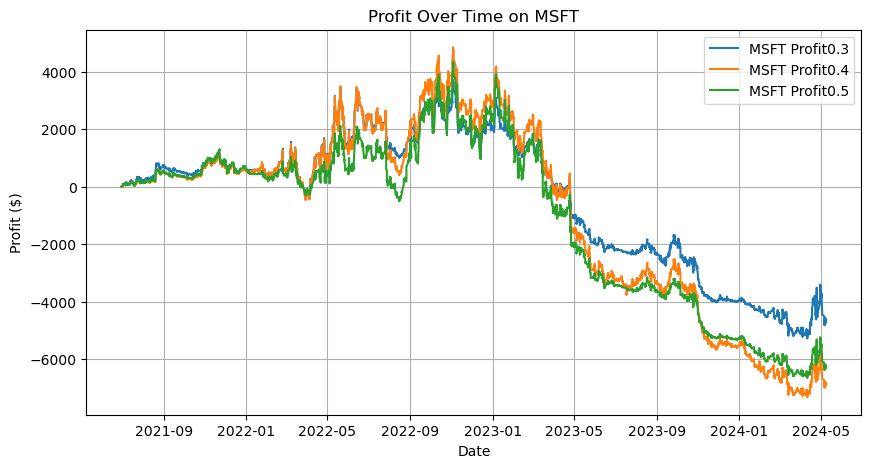

In [20]:
plt.figure(figsize=(10, 5))
# for ticker in tickers:
ticker = 'MSFT' #insert any tickers you are curious about
for k in k_values:
    k_str = str(k)
    df[ticker]['Datetime'] = pd.to_datetime(df[ticker]['Datetime'])
    plt.plot(df[ticker]['Datetime'], df[ticker][f'{ticker} Profit{k_str}'], label = f'{ticker} Profit{k_str}')
plt.title(f'Profit Over Time on {ticker}')  # Set the title of the graph
plt.xlabel('Date')  # Set the x-axis label
plt.ylabel('Profit ($)')  # Set the y-axis label
plt.grid(True)  # Optional: Adds a grid for easier reading
plt.legend(loc='best')
plt.show()

In [18]:
df['BTC-USD']

,Datetime,Open,High,Low,Close,Volume,BTC-USD Lower Range0.3,BTC-USD Higher Range0.3,BTC-USD Signals0.3,BTC-USD Lower Range0.4,...,BTC-USD Signals0.5,BTC-USD Balance0.3,BTC-USD Position0.3,BTC-USD Profit0.3,BTC-USD Balance0.4,BTC-USD Position0.4,BTC-USD Profit0.4,BTC-USD Balance0.5,BTC-USD Position0.5,BTC-USD Profit0.5
1,2022-05-21,29268.769531,29278.212891,29027.394531,29124.964844,0,0.000000,0.000000,1,0.000000,...,1,-2.915280e+04,1,0.000000e+00,-2.915280e+04,1,0.000000e+00,-2.915280e+04,1,0.000000e+00
2,2022-05-21,29126.222656,29233.199219,29074.615234,29204.816406,0,0.000000,0.000000,1,0.000000,...,1,-5.830671e+04,2,1.103516e+00,-5.830671e+04,2,1.103516e+00,-5.830671e+04,2,1.103516e+00
3,2022-05-21,29203.884766,29242.314453,29119.677734,29242.314453,0,0.000000,0.000000,1,0.000000,...,1,-8.748771e+04,3,5.528125e+01,-8.748771e+04,3,5.528125e+01,-8.748771e+04,3,5.528125e+01
4,2022-05-21,29244.060547,29250.714844,29208.951172,29226.777344,0,0.000000,0.000000,1,0.000000,...,1,-1.167175e+05,4,2.017920e+02,-1.167175e+05,4,2.017920e+02,-1.167175e+05,4,2.017920e+02
5,2022-05-21,29231.164062,29276.962891,29212.505859,29255.146484,0,0.000000,0.000000,1,0.000000,...,1,-1.459623e+05,5,2.613975e+02,-1.459623e+05,5,2.613975e+02,-1.459623e+05,5,2.613975e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17222,2024-05-09,61227.433594,61227.433594,60860.144531,60860.144531,93763584,60538.519922,61803.894141,0,60327.624219,...,0,-1.176955e+07,248,3.369305e+06,-1.272111e+07,316,6.568724e+06,-1.157966e+07,288,6.000954e+06
17223,2024-05-09,60796.273438,61138.265625,60660.460938,61054.527344,556580864,60538.519922,61803.894141,0,60327.624219,...,0,-1.176955e+07,248,3.333487e+06,-1.272111e+07,316,6.523085e+06,-1.157966e+07,288,5.959359e+06
17224,2024-05-09,61030.644531,61514.394531,61030.644531,61511.660156,472649728,60538.519922,61803.894141,0,60327.624219,...,0,-1.176955e+07,248,3.426030e+06,-1.272111e+07,316,6.641002e+06,-1.157966e+07,288,6.066828e+06
17225,2024-05-09,61496.011719,61496.011719,60916.242188,61136.191406,247199744,60538.519922,61803.894141,0,60327.624219,...,0,-1.176955e+07,248,3.409565e+06,-1.272111e+07,316,6.620022e+06,-1.157966e+07,288,6.047707e+06
